In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

In [9]:
X , y = make_blobs(centers=2, random_state=42)

In [10]:
X.shape, y.shape

((100, 2), (100,))

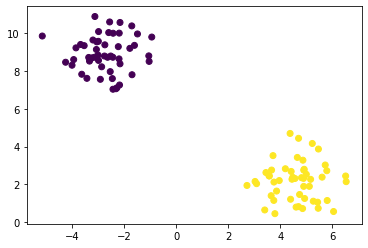

In [11]:
plt.scatter(X[:, 0], X[:, 1], c=y)

In [53]:
class CustomLogisticReg:
    def __init__(self, lr=.01, iters=100):
        self.lr = lr
        self.iters = iters
    
    def fit(self, X, y):
        X = np.hstack([np.ones((X.shape[0], 1)), X])
        
        self.theta_ = np.random.randn(X.shape[1], 1)
        errors = []
        
        for i in range(self.iters):
            error = self.gradient_decend(X, y)
            errors.append(error)
            
        return errors
    
    def gradient_decend(self, X, y):
        delta_theta, error = self.gradient(X, y)
        self.theta_ += delta_theta
        return error
    
    def gradient(self, X, y):
        ya = y.reshape(-1, 1)   # reshape of y because actual y shape is (100,) which needed to be convert over (100, 1)
        yh = self.hypo(X)
        
        dneglldt = np.dot(X.T,(yh-ya))/len(X)
       
        delta_theta = -dneglldt*self.lr
       
        error = -np.mean((ya * np.log(yh)) + ((1-ya)*np.log(1-yh)))
        return delta_theta, error
        
    def hypo(self, X):
        g = np.dot(X, self.theta_)
        return 1/ (1 + np.exp(-g))
    
    def predict(self, X):
        X = np.hstack([np.ones([X.shape[0], 1]), X])
        result = self.hypo(X)
        return (result.flatten() > .5).astype(int)

In [54]:
model = CustomLogisticReg(iters=1000)

In [55]:
error = model.fit(X, y)

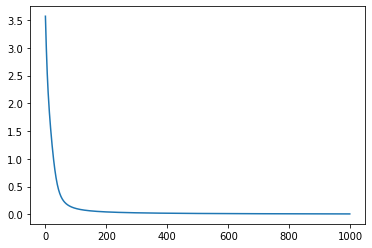

In [56]:
plt.plot(error)

In [57]:
model.predict(X)

array([0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0])

In [58]:
y

array([0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0])